In [1]:
import pandas as pd
import anndata as ad
import numpy as np
import os
import re
import argparse
import scanpy as sc
from matplotlib import cm
import matplotlib.pyplot as plt
from src.classes import *

In [71]:
file = '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster.h5ad'
output = f'{file.split(".h5ad")[0]}_regions.h5ad'
adata = sc.read_h5ad(file)
adata.obs['cluster'] = adata.obs['cluster'].astype('str')
adata, output

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(AnnData object with n_obs × n_vars = 8206 × 15043
     obs: 'feature', 'orig_feature', 'array_row', 'array_col', 'in_tissue', 'sample', 'slide', 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'n_transcripts', 'G_content', 'RNOG_content', 'median_gene_feature', 'median_transcript_feature', 'MT_perc', 'ribo_perc', 'cluster', 'umap1', 'umap2'
     var: 'ensembl_id', 'name', 'gene_id', 'species', 'value', 'Gene_no_alt', 'MT', 'ribo'
     uns: 'merged', 'sample', 'spatial'
     obsm: 'spatial',
 '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster_regions.h5ad')

In [72]:
samples = adata.obs['sample'].unique()

0      240.914062
1      240.914062
2      770.925000
3      385.462500
4      530.010937
          ...    
751    289.096875
752    481.828125
753    674.559375
754    915.473437
755    289.096875
Name: x, Length: 756, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
751     627.307353
752    1495.886765
753     144.763235
754    1013.342647
755    1158.105882
Name: y, Length: 756, dtype: float64
[ 5.  3.  4. 18. 13. 11. 17.  1. 19. 14.  9.  7.  2. 15. 12.  6. 10.  8.
 16.]


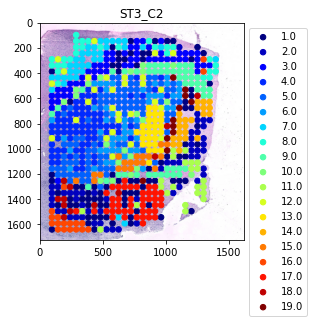

0       239.726562
1       239.726562
2       767.125000
3       383.562500
4       527.398438
          ...     
938    1390.414062
939     287.671875
940     479.453125
941     910.960938
942     287.671875
Name: x, Length: 943, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
938     916.833824
939     627.307353
940    1495.886765
941    1013.342647
942    1158.105882
Name: y, Length: 943, dtype: float64
[ 2.  7.  6.  4.  5.  3. 11. 17. 14.  1. 10. 13.  9. 12.  8. 18. 15. 19.
 16.]


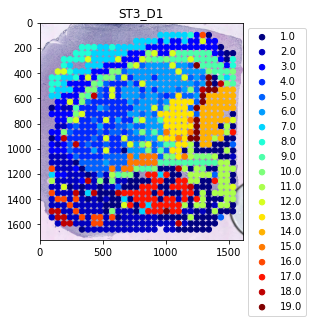

0      240.617187
1      240.617187
2      769.975000
3      384.987500
4      529.357812
          ...    
817    288.740625
818    481.234375
819    673.728125
820    914.345312
821    288.740625
Name: x, Length: 822, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
817     627.307353
818    1495.886765
819     144.763235
820    1013.342647
821    1158.105882
Name: y, Length: 822, dtype: float64
[ 4. 10. 13.  1.  2. 17.  6.  5. 14.  3. 11. 15. 12. 19.  7.  9. 18. 16.
  8.]


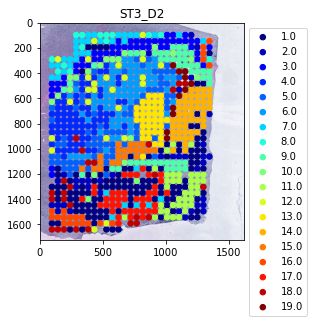

0      240.765625
1      240.765625
2      770.450000
3      385.225000
4      529.684375
          ...    
925    288.918750
926    481.531250
927    674.143750
928    914.909375
929    288.918750
Name: x, Length: 930, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
925     627.307353
926    1495.886765
927     144.763235
928    1013.342647
929    1158.105882
Name: y, Length: 930, dtype: float64
[ 3.  7.  4.  5. 18. 15. 11.  1. 19.  6.  9.  2. 13. 10.  8. 17. 12. 16.
 14.]


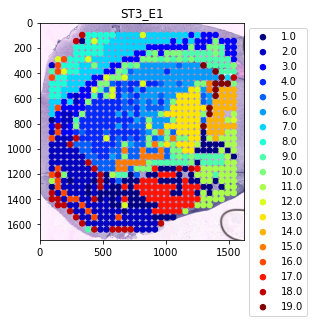

0      239.578125
1      239.578125
2      766.650000
3      383.325000
4      527.071875
          ...    
831    287.493750
832    479.156250
833    670.818750
834    910.396875
835    287.493750
Name: x, Length: 836, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
831     627.307353
832    1495.886765
833     144.763235
834    1013.342647
835    1158.105882
Name: y, Length: 836, dtype: float64
[19.  2.  6. 13.  4.  9.  7.  3.  1. 18.  5. 10. 16. 14. 15. 17.  8. 12.
 11.]


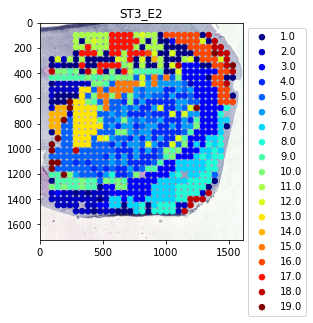

0      1232.684375
1       758.575000
2        94.821875
3       426.698437
4      1232.684375
          ...     
792     948.218750
793    1090.451562
794     948.218750
795    1137.862500
796     711.164062
Name: x, Length: 797, dtype: float64
0       434.792647
1       772.964706
2      1352.688235
3      1400.998529
4       289.861765
          ...     
792     966.205882
793    1449.308824
794     628.033824
795    1256.067647
796    1497.619118
Name: y, Length: 797, dtype: float64
[ 3.  6. 16. 18. 15.  7. 13. 19.  2.  9. 11. 14.  8.  5. 10. 12.  4.  1.
 17.]


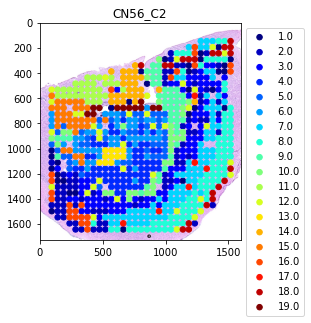

0       716.507812
1      1241.946875
2       764.275000
3       429.904687
4      1241.946875
          ...     
721     238.835938
722     525.439062
723     429.904687
724     955.343750
725     955.343750
Name: x, Length: 726, dtype: float64
0       144.930882
1       434.792647
2       772.964706
3      1400.998529
4       289.861765
          ...     
721    1111.136765
722    1207.757353
723     724.654412
724     966.205882
725     628.033824
Name: y, Length: 726, dtype: float64
[ 8.  5.  6.  2.  3.  7. 10. 13.  4.  1. 12.  9. 15. 16. 19. 14. 11. 18.]


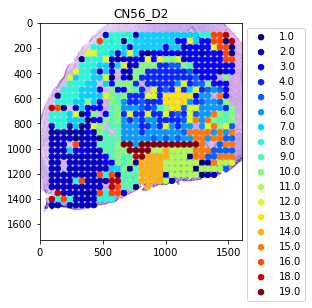

0       709.382812
1      1229.596875
2       756.675000
3       425.629687
4      1229.596875
          ...     
775     520.214062
776     425.629687
777     945.843750
778     945.843750
779     709.382812
Name: x, Length: 780, dtype: float64
0       144.092647
1       432.277941
2       768.494118
3      1392.895588
4       288.185294
          ...     
775    1200.772059
776     720.463235
777     960.617647
778     624.401471
779    1488.957353
Name: y, Length: 780, dtype: float64
[16.  9. 13.  2. 17. 15.  7.  1.  4.  8.  5.  3.  6. 12. 11. 10. 18. 19.
 14.]


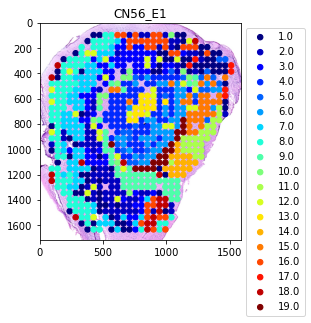

0       710.71875
1      1231.91250
2       758.10000
3       426.43125
4       142.14375
          ...    
706     947.62500
707    1089.76875
708     947.62500
709    1137.15000
710     710.71875
Name: x, Length: 711, dtype: float64
0       144.260294
1       432.780882
2       769.388235
3      1394.516176
4       288.520588
          ...     
706     961.735294
707    1442.602941
708     625.127941
709    1250.255882
710    1490.689706
Name: y, Length: 711, dtype: float64
[ 7.  8.  6. 17.  1. 16.  2.  4.  9. 15.  3. 19. 14. 18. 10.  5. 13. 11.
 12.]


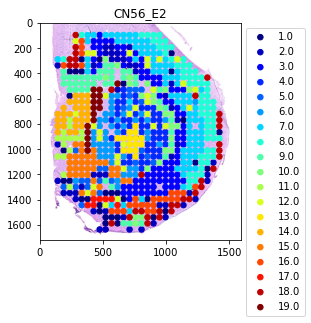

0      1218.018750
1       749.550000
2       421.621875
3       140.540625
4      1218.018750
          ...     
900     936.937500
901    1077.478125
902     936.937500
903    1124.325000
904     702.703125
Name: x, Length: 905, dtype: float64
0       435.295588
1       773.858824
2      1402.619118
3       290.197059
4       290.197059
          ...     
900     967.323529
901    1450.985294
902     628.760294
903    1257.520588
904    1499.351471
Name: y, Length: 905, dtype: float64
[13.  5.  1. 16.  4.  7.  8.  2.  9. 15. 10.  6. 19. 11.  3. 12. 17. 18.
 14.]


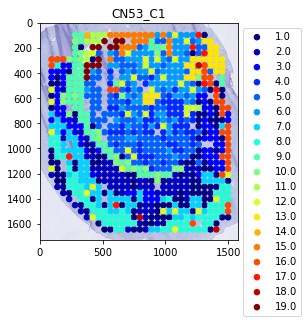

<Figure size 432x288 with 0 Axes>

In [73]:
for sample in samples:
    plot_ST(adata, sample, show=True, output=False, feat_max=[34, 32], color='cluster', s=30)

In [74]:
region_marker_dict= {'STR': ['PENK', 'ADORA2A', 'PPP1R1B'],
                     'SN': ['TH', 'PBX1', 'SLC6A3', 'ALDH1A1', 'DDC', 'RET'],
                     'CC': ['MBP']}
adata.uns['regions_dict'] = dict()

In [75]:
# detect human  regions
def detect_human_regions(adata, cutoff=0.15):
    cluster_human_content = adata.obs.groupby('cluster').mean()
    cluster_human_content = cluster_human_content[cluster_human_content['G_content'] > cutoff]

    max_human = cluster_human_content[cluster_human_content['G_content'] == cluster_human_content['G_content'].max()].index
    print(max_human)
    partial = [x for x in cluster_human_content.index if x not in max_human]
    print(cluster_human_content)
    print(partial)
    adata.obs['partial_human'] = [True if x in partial else False for x in adata.obs.cluster]
    # adata_no_partial = adata.copy()
    # #adata_no_partial = adata_no_partial[adata_no_partial.obs.partial_human == False, :]
    # print(adata_no_partial.X)
    adata.obs['TX'] = [True if x in max_human else False for x in adata.obs.cluster]
    adata.uns['regions'] = ['TX']

    for cluster in max_human:
        adata.uns['regions_dict'][str(cluster)] = 'TX'
        
def remove_partial_cluster(adata, column='partial_human'):
    adata = adata[adata.obs[column] == False, :]
    print((adata.obs[column] == False).value_counts())
    
    return adata

In [76]:
detect_human_regions(adata)
adata.obs['partial_human'].value_counts(), adata.obs.shape

Index(['13'], dtype='object', name='cluster')
         array_row  array_col  in_tissue          x          y      new_x  \
cluster                                                                     
13       19.169291  15.480315        1.0  19.169291  15.480315  19.160984   

             new_y      pixel_x      pixel_y  n_transcripts  G_content  \
cluster                                                                  
13       15.477874  1645.483465  1262.916929    8761.598633   0.358932   

         RNOG_content  median_gene_feature  median_transcript_feature  \
cluster                                                                 
13           0.641068               2540.0                     6252.0   

         MT_perc  ribo_perc     umap1     umap2  
cluster                                          
13       0.05374   0.017433  8.632754  4.527626  
[]


(False    8206
 Name: partial_human, dtype: int64,
 (8206, 25))

0      1230.368750
1       757.150000
2      1230.368750
3      1230.368750
4       189.287500
          ...     
623     236.609375
624     520.540625
625     425.896875
626     946.437500
627     946.437500
Name: x, Length: 628, dtype: float64
0       437.055882
1       776.988235
2       291.370588
3       728.426471
4      1019.797059
          ...     
623    1116.920588
624    1214.044118
625     728.426471
626     971.235294
627     631.302941
Name: y, Length: 628, dtype: float64
[0.]


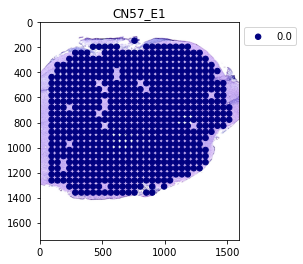

0      1224.965625
1       753.825000
2       424.026562
3      1224.965625
4      1224.965625
          ...     
592     942.281250
593    1083.623437
594     942.281250
595    1130.737500
596     706.710937
Name: x, Length: 597, dtype: float64
0       436.05
1       775.20
2      1405.05
3       290.70
4       726.75
        ...   
592     969.00
593    1453.50
594     629.85
595    1259.70
596    1501.95
Name: y, Length: 597, dtype: float64
[0.]


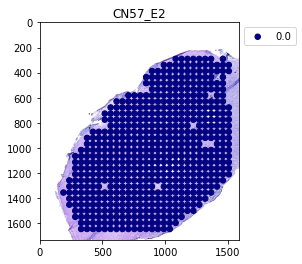

0      240.171875
1      240.171875
2      768.550000
3      384.275000
4      528.378125
          ...    
650    336.240625
651    288.206250
652    480.343750
653    912.653125
654    288.206250
Name: x, Length: 655, dtype: float64
0       675.561765
1       530.798529
2       675.561765
3       723.816176
4      1158.105882
          ...     
650     868.579412
651     627.307353
652    1495.886765
653    1013.342647
654    1158.105882
Name: y, Length: 655, dtype: float64
[0.]


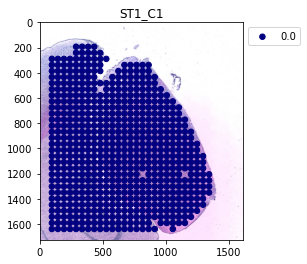

0       773.30000
1       386.65000
2       531.64375
3       966.62500
4      1401.60625
          ...    
758     338.31875
759    1401.60625
760     289.98750
761     483.31250
762     918.29375
Name: x, Length: 763, dtype: float64
0       675.561765
1       723.816176
2      1158.105882
3       868.579412
4      1351.123529
          ...     
758     868.579412
759     916.833824
760     627.307353
761    1495.886765
762    1013.342647
Name: y, Length: 763, dtype: float64
[0.]


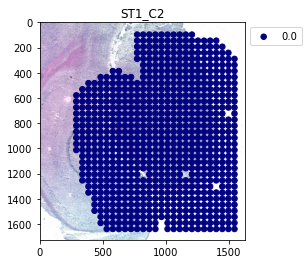

0      240.171875
1      768.550000
2      384.275000
3      528.378125
4      432.309375
          ...    
926    288.206250
927    480.343750
928    672.481250
929    912.653125
930    288.206250
Name: x, Length: 931, dtype: float64
0       675.561765
1       675.561765
2       723.816176
3      1158.105882
4       434.289706
          ...     
926     627.307353
927    1495.886765
928     144.763235
929    1013.342647
930    1158.105882
Name: y, Length: 931, dtype: float64
[0.]


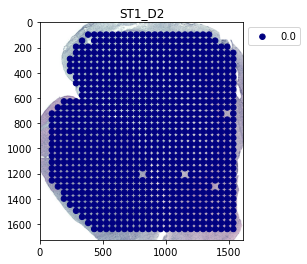

0       706.265625
1      1224.193750
2       753.350000
3       141.253125
4      1224.193750
          ...     
608      94.168750
609     235.421875
610     423.759375
611     941.687500
612     941.687500
Name: x, Length: 613, dtype: float64
0       145.266176
1       435.798529
2       774.752941
3       290.532353
4       290.532353
          ...     
608    1113.707353
609    1113.707353
610     726.330882
611     968.441176
612     629.486765
Name: y, Length: 613, dtype: float64
[0.]


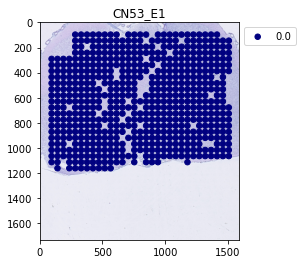

0       704.039062
1      1220.334375
2       750.975000
3       140.807812
4      1220.334375
          ...     
624      93.871875
625     234.679687
626     422.423437
627     938.718750
628     938.718750
Name: x, Length: 629, dtype: float64
0       145.601471
1       436.804412
2       776.541176
3       291.202941
4       291.202941
          ...     
624    1116.277941
625    1116.277941
626     728.007353
627     970.676471
628     630.939706
Name: y, Length: 629, dtype: float64
[0.]


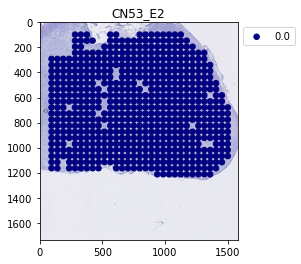

0       712.5
1      1235.0
2       760.0
3       427.5
4       142.5
        ...  
852     950.0
853    1092.5
854     950.0
855    1140.0
856     712.5
Name: x, Length: 857, dtype: float64
0       145.014706
1       435.044118
2       773.411765
3      1401.808824
4       290.029412
          ...     
852     966.764706
853    1450.147059
854     628.397059
855    1256.794118
856    1498.485294
Name: y, Length: 857, dtype: float64
[0.]


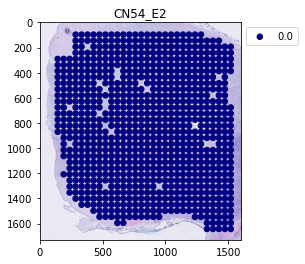

<Figure size 432x288 with 0 Axes>

In [62]:
for sample in samples:
    plot_ST(adata_nopart, sample, show=True, output=False, feat_max=[34, 32], color='TX', s=30)

In [77]:
def create_pseudobulk(adata, groupby='cluster', separateby='sample'):
    replicates = adata.obs[separateby].unique()
    obs_cols = adata.obs.columns
    pseudobulk_df = pd.DataFrame()
    for replicate in replicates:
        print('creating pseudobulk for', replicate)
        replicate_adata = adata[adata.obs[separateby] == replicate, :]
        gene_df = pd.DataFrame(replicate_adata.X,
                               columns=replicate_adata.var.index.to_list(),
                               index=replicate_adata.obs[groupby])
        gene_df = gene_df.groupby(groupby).sum()
        obs_df = replicate_adata.obs.groupby(groupby).mean()
        replicate_df = pd.concat([obs_df, gene_df], axis=1)
        replicate_df[separateby] = replicate
        replicate_df = replicate_df.reset_index()
        pseudobulk_df = pseudobulk_df.append(replicate_df)
    adata_pseudobulk = ad.AnnData(X=np.array(pseudobulk_df[replicate_adata.var.index.to_list()]),
                                  obs=pseudobulk_df[[x for x in pseudobulk_df.columns if x in obs_cols]],
                                  var=replicate_adata.var)
    adata_pseudobulk.uns = adata.uns

    return adata_pseudobulk

In [81]:
adata_pseudo = create_pseudobulk(adata)
adata_pseudo

creating pseudobulk for ST3_C2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for ST3_D1


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for ST3_D2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for ST3_E1


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for ST3_E2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for CN56_C2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for CN56_D2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for CN56_E1


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for CN56_E2


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)


creating pseudobulk for CN53_C1


/tmp/ipykernel_39055/3466527173.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pseudobulk_df = pseudobulk_df.append(replicate_df)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 189 × 15043
    obs: 'cluster', 'array_row', 'array_col', 'in_tissue', 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'n_transcripts', 'G_content', 'RNOG_content', 'median_gene_feature', 'median_transcript_feature', 'MT_perc', 'ribo_perc', 'umap1', 'umap2', 'partial_human', 'TX', 'sample'
    var: 'ensembl_id', 'name', 'gene_id', 'species', 'value', 'Gene_no_alt', 'MT', 'ribo'
    uns: 'merged', 'sample', 'spatial', 'regions_dict', 'regions'

In [54]:
'SN' in adata_pseudo.uns['regions_dict'].values()

True

In [82]:
def select_regions_clusters(adata, region_marker_dict, regions=['STR'], cutoff=0.75):
    "expects "
    for region in regions:
        print(region)
        
        adata.obs[region + '_score'] = adata[:, region_marker_dict[region]].X.mean(axis=1)
        adata.obs[region + '_score'] = adata.obs[region + '_score']-adata.obs[region + '_score'].mean()
        adata.obs[region + '_score'] = adata.obs[region + '_score']/adata.obs[region + '_score'].std()

        score = adata.obs.groupby('cluster').mean()
        score[region] = score[region + '_score'] > cutoff
        cluster_region_map = dict(score[region])
        adata.obs[region] = adata.obs['cluster'].map(cluster_region_map)
        for cluster, value in cluster_region_map.items():
            if value == True and cluster not in adata.uns['regions_dict'].keys():
                    adata.uns['regions_dict'][str(cluster)] = region

    adata.uns['regions'] = adata.uns['regions'] + regions

    return adata

In [102]:
adata_pseudo = select_regions_clusters(adata_pseudo, region_marker_dict=region_marker_dict, regions=['STR'])

adata_pseudo.obs

STR


,cluster,array_row,array_col,in_tissue,x,y,new_x,new_y,pixel_x,pixel_y,...,ribo_perc,umap1,umap2,partial_human,TX,sample,STR_score,STR,pseubobuk_cluter,pseubobuk_cluster
0,1,14.738095,21.250000,1.0,14.738095,21.250000,14.702976,21.289643,695.475000,1028.442857,...,0.010267,-3.214013,-0.697970,0.0,0.0,ST3_C2,-0.541581,False,ST3_C2_1,ST3_C2_1
1,10,13.809524,16.238095,1.0,13.809524,16.238095,13.752857,16.292857,647.504762,775.223810,...,0.012962,0.301336,2.232016,0.0,0.0,ST3_C2,-0.664930,False,ST3_C2_10,ST3_C2_10
2,11,22.521739,26.521739,1.0,22.521739,26.521739,22.506957,26.548261,1089.582609,1294.900000,...,0.009815,-2.040462,-5.721696,0.0,0.0,ST3_C2,-0.724615,False,ST3_C2_11,ST3_C2_11
3,12,12.379310,12.379310,1.0,12.379310,12.379310,12.363793,12.440690,577.365517,580.003448,...,0.010191,5.411227,0.185673,0.0,0.0,ST3_C2,-0.495159,False,ST3_C2_12,ST3_C2_12
4,13,18.444444,17.851852,1.0,18.444444,17.851852,18.372963,17.890370,880.818519,856.166667,...,0.013992,8.680598,5.022498,0.0,1.0,ST3_C2,-0.633098,False,ST3_C2_13,ST3_C2_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,5,17.484848,14.810606,1.0,17.484848,14.810606,17.441591,14.866212,802.421970,706.909091,...,0.011117,8.949966,-2.495685,0.0,0.0,CN53_C1,1.580559,False,CN53_C1_5,CN53_C1_5
15,6,19.930233,9.360465,1.0,19.930233,9.360465,19.875349,9.430233,921.375581,431.717442,...,0.011600,9.278227,-1.320376,0.0,0.0,CN53_C1,1.491694,True,CN53_C1_6,CN53_C1_6
16,7,13.971014,25.840580,1.0,13.971014,25.840580,14.105797,25.907971,639.442029,1265.775362,...,0.009952,-9.114522,3.606389,0.0,0.0,CN53_C1,-0.305493,False,CN53_C1_7,CN53_C1_7
17,8,17.169014,29.464789,1.0,17.169014,29.464789,17.353099,29.519718,798.090141,1448.605634,...,0.009948,-7.898104,5.729454,0.0,0.0,CN53_C1,-0.304166,False,CN53_C1_8,CN53_C1_8


In [112]:
adata_pseudo.obs['pseubobuk_cluster'] = adata_pseudo.obs['sample'] + '_' + adata_pseudo.obs['cluster']
adata.obs['pseubobuk_cluster'] = adata.obs['sample'].astype('str') + '_' + adata.obs['cluster']
cols_to_add = ['pseubobuk_cluster', 'STR_score', 'G_content', 'RNOG_content']
pseudo_np = adata_pseudo.obs[cols_to_add].to_numpy()
# print(pseudo_np)
for idx, col in enumerate(cols_to_add[1:]):
    pseudo_cluster_mapping = {col:attr for col, attr in pseudo_np[:, [0, idx + 1]]}
    adata.obs[f'{cols_to_add[idx + 1]}_pseudo'] = adata.obs['pseubobuk_cluster'].map(pseudo_cluster_mapping)
adata.obs

,feature,orig_feature,array_row,array_col,in_tissue,sample,slide,x,y,new_x,...,cluster,umap1,umap2,partial_human,TX,pseubobuk_cluster,STR_score,STR_score_pseudo,G_content_pseudo,RNOG_content_pseudo
0,X4.95_14.07,X5_14,5.0,14.0,1,ST3_C2,ST3,5,14,4.95,...,5,10.222911,-1.836276,False,False,ST3_C2_5,0.408077,0.408077,0.053131,0.946869
1,X4.95_11.06,X5_11,5.0,11.0,1,ST3_C2,ST3,5,11,4.95,...,3,-5.673122,3.218205,False,False,ST3_C2_3,-0.560149,-0.560149,0.040776,0.959224
2,X15.94_14.05,X16_14,16.0,14.0,1,ST3_C2,ST3,16,14,15.94,...,5,8.964866,-0.532416,False,False,ST3_C2_5,0.408077,0.408077,0.053131,0.946869
3,X8.01_14.97,X8_15,8.0,15.0,1,ST3_C2,ST3,8,15,8.01,...,4,10.516252,-0.928986,False,False,ST3_C2_4,1.020845,1.020845,0.038617,0.961383
4,X10.91_24.02,X11_24,11.0,24.0,1,ST3_C2,ST3,11,24,10.91,...,5,9.967836,-0.597351,False,False,ST3_C2_5,0.408077,0.408077,0.053131,0.946869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,X19.95_20.05,X20_20,20.0,20.0,1,CN53_C1,CN53,20,20,19.95,...,5,8.755996,-4.148428,False,False,CN53_C1_5,1.580559,1.580559,0.084690,0.915310
8202,X23.22_30.02,X23_30,23.0,30.0,1,CN53_C1,CN53,23,30,23.22,...,7,-9.567310,3.055227,False,False,CN53_C1_7,-0.305493,-0.305493,0.070649,0.929351
8203,X19.85_13.09,X20_13,20.0,13.0,1,CN53_C1,CN53,20,13,19.85,...,5,9.825599,-3.037257,False,False,CN53_C1_5,1.580559,1.580559,0.084690,0.915310
8204,X24.1_26.01,X24_26,24.0,26.0,1,CN53_C1,CN53,24,26,24.10,...,2,-5.558780,-0.640354,False,False,CN53_C1_2,-0.284271,-0.284271,0.078440,0.921560


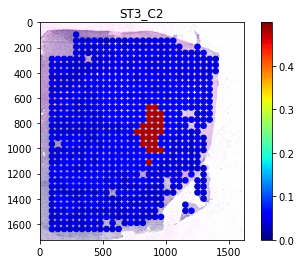

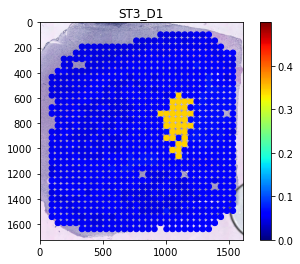

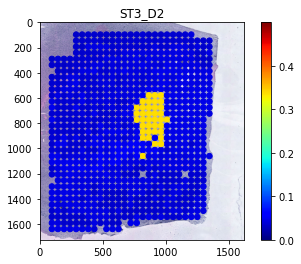

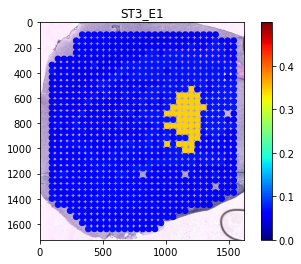

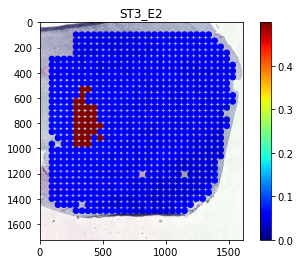

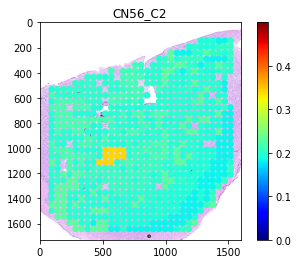

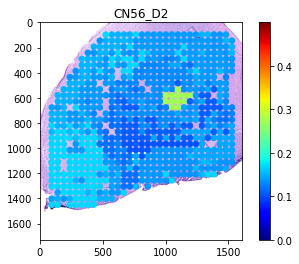

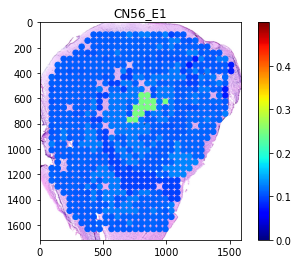

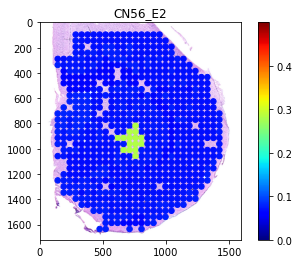

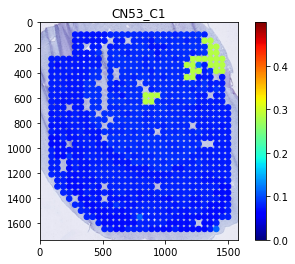

<Figure size 432x288 with 0 Axes>

In [115]:
for sample in samples:
    plot_ST(adata, color = 'G_content_pseudo', sample = sample)

,feature,orig_feature,array_row,array_col,in_tissue,sample,slide,x,y,new_x,...,median_transcript_feature,MT_perc,ribo_perc,cluster,umap1,umap2,partial_human,TX,pseubobuk_cluster,STR_score
0,X4.95_14.07,X5_14,5.0,14.0,1,ST3_C2,ST3,5,14,4.95,...,6252.0,0.100491,0.012089,5,10.222911,-1.836276,False,False,ST3_C2_5,0.408077
1,X4.95_11.06,X5_11,5.0,11.0,1,ST3_C2,ST3,5,11,4.95,...,6252.0,0.084567,0.011477,3,-5.673122,3.218205,False,False,ST3_C2_3,-0.560149
2,X15.94_14.05,X16_14,16.0,14.0,1,ST3_C2,ST3,16,14,15.94,...,6252.0,0.089566,0.008061,5,8.964866,-0.532416,False,False,ST3_C2_5,0.408077
3,X8.01_14.97,X8_15,8.0,15.0,1,ST3_C2,ST3,8,15,8.01,...,6252.0,0.103179,0.007808,4,10.516252,-0.928986,False,False,ST3_C2_4,1.020845
4,X10.91_24.02,X11_24,11.0,24.0,1,ST3_C2,ST3,11,24,10.91,...,6252.0,0.119331,0.009649,5,9.967836,-0.597351,False,False,ST3_C2_5,0.408077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,X19.95_20.05,X20_20,20.0,20.0,1,CN53_C1,CN53,20,20,19.95,...,6252.0,0.106814,0.006998,5,8.755996,-4.148428,False,False,CN53_C1_5,1.580559
8202,X23.22_30.02,X23_30,23.0,30.0,1,CN53_C1,CN53,23,30,23.22,...,6252.0,0.074495,0.010621,7,-9.567310,3.055227,False,False,CN53_C1_7,-0.305493
8203,X19.85_13.09,X20_13,20.0,13.0,1,CN53_C1,CN53,20,13,19.85,...,6252.0,0.092042,0.010275,5,9.825599,-3.037257,False,False,CN53_C1_5,1.580559
8204,X24.1_26.01,X24_26,24.0,26.0,1,CN53_C1,CN53,24,26,24.10,...,6252.0,0.084323,0.009976,2,-5.558780,-0.640354,False,False,CN53_C1_2,-0.284271


In [67]:
adata_pseudo.obs['region'] = adata_pseudo.obs.cluster.map(adata_pseudo.uns['regions_dict']).astype('str')
adata_pseudo.obs.region = adata_pseudo.obs['region'].str.replace('nan', 'other')
adata_pseudo.obs.region = adata_pseudo.obs.region.astype('category')
adata_pseudo

AnnData object with n_obs × n_vars = 87 × 15043
    obs: 'cluster', 'array_row', 'array_col', 'in_tissue', 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'n_transcripts', 'G_content', 'RNOG_content', 'median_gene_feature', 'median_transcript_feature', 'MT_perc', 'ribo_perc', 'umap1', 'umap2', 'partial_human', 'TX', 'sample', 'SN_score', 'SN', 'region'
    var: 'ensembl_id', 'name', 'gene_id', 'species', 'value', 'Gene_no_alt', 'MT', 'ribo'
    uns: 'merged', 'sample', 'spatial', 'regions_dict', 'regions'

In [68]:
adata_pseudo.write_h5ad(output)

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_39055/3518312988.py:6: RuntimeWarning: invalid value encountered in true_divide
  adata_pseudo.X = (adata_pseudo.X - np.mean(adata_pseudo.X, axis=0))/np.std(adata_pseudo.X, axis=0)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide b

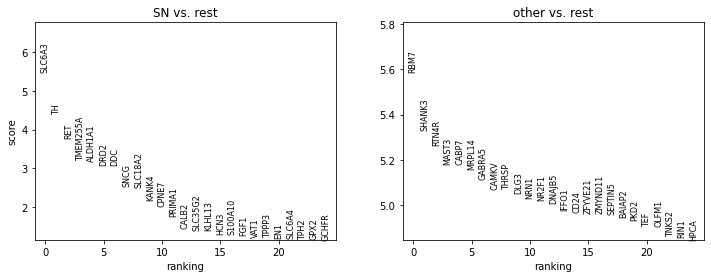

In [69]:
adata_pseudo.raw = adata_pseudo.copy()
sc.pp.normalize_total(adata_pseudo)
sc.pp.log1p(adata_pseudo)

# scale
adata_pseudo.X = (adata_pseudo.X - np.mean(adata_pseudo.X, axis=0))/np.std(adata_pseudo.X, axis=0)

sc.pp.highly_variable_genes(adata_pseudo, flavor='seurat', n_top_genes=3000, batch_key='sample', subset=True)
top_hvg = adata_pseudo.var.sort_values(by='dispersions_norm', ascending=False)

## uncomment the following line if you want to remove all 'other' areas
#nonpartial_adata = nonpartial_adata[nonpartial_adata.obs[nonpartial_adata.uns['regions']].max(axis=1) == 1, :]

sc.tl.rank_genes_groups(adata_pseudo, 'region', method='t-test', key_added="t-test", use_raw=True)
sc.pl.rank_genes_groups(adata_pseudo, n_genes=25, sharey=False, key="t-test")

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: SN, other
var_group_labels: SN


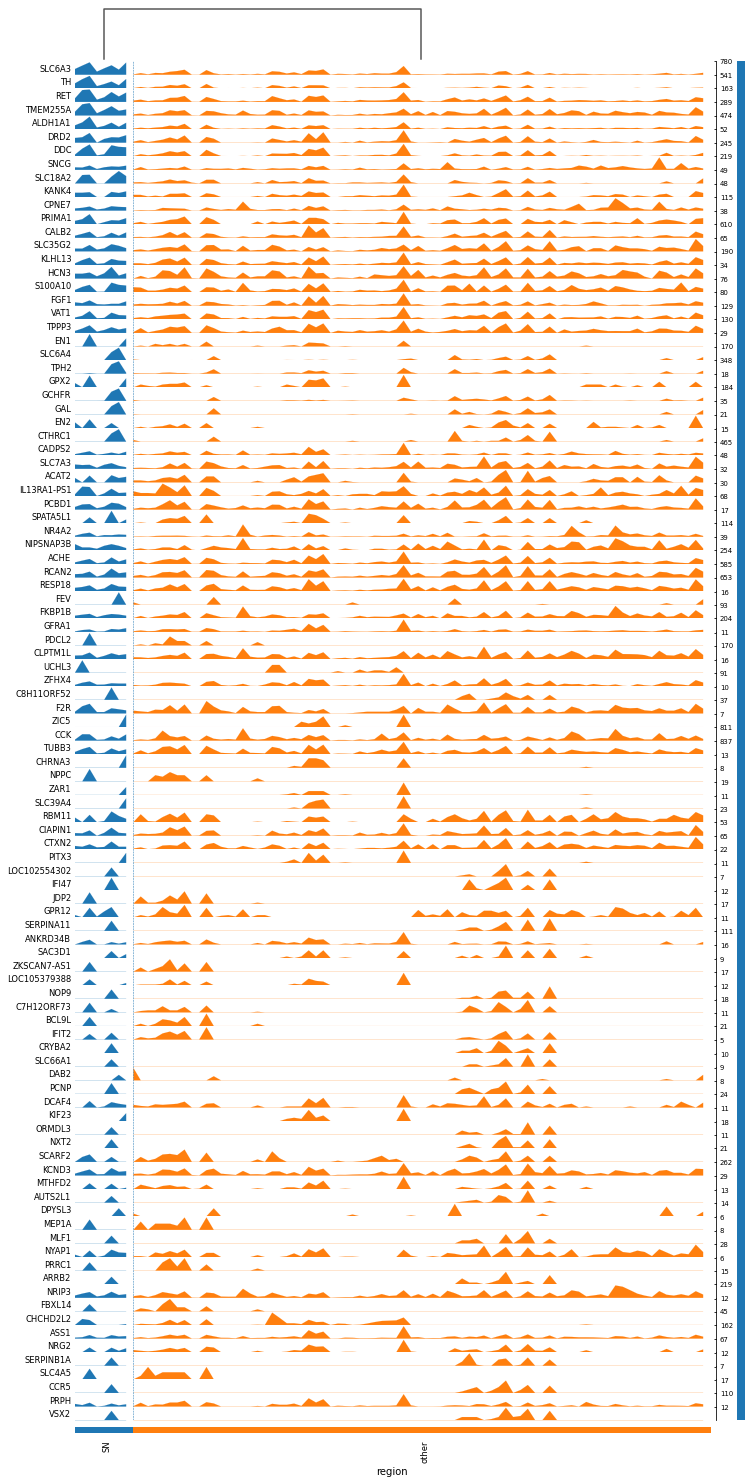

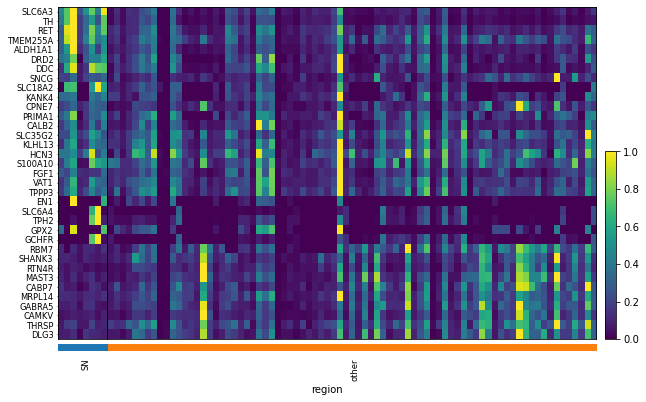

In [70]:
focus_region = False
if 'SN' in adata_pseudo.uns['regions_dict'].values():
    focus_region = 'SN'
    contrast_region = 'other'
elif 'TX' in adata_pseudo.uns['regions_dict'].values():
    focus_region = 'SN'
    contrast_region = 'STR'
    
if focus_region:
    sc.pl.rank_genes_groups_tracksplot(adata_pseudo, groupby='region', key="t-test", groups=[focus_region], n_genes=100, save=False)
    #sc.pl.rank_genes_groups_heatmap(adata_pseudo, groupby='region', key="t-test", groups=['SN'], n_genes=100, save=False, standard_scale='var', show_gene_labels=True)
    sc.pl.heatmap(adata_pseudo,
                  var_names=list(adata_pseudo.uns['t-test']['names'][focus_region][:25]) + list(adata_pseudo.uns['t-test']['names'][contrast_region][:10]),
                  groupby='region', standard_scale='var', var_group_rotation=90,
                  save=f'heatmap_{focus_region}-{contrast_region}_DEG_sum.pdf', show_gene_labels=True,
                  swap_axes=True)
